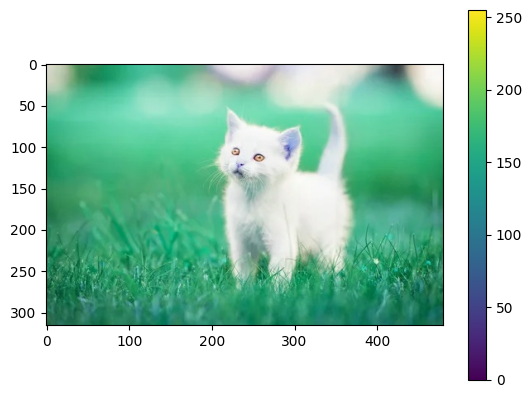

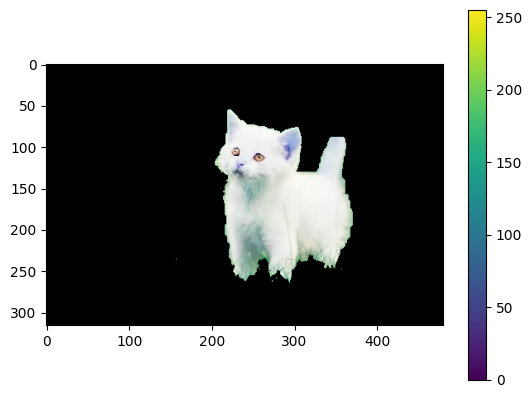

(<matplotlib.image.AxesImage at 0x2131d4c5d90>,
 None)

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('CatImage.jpg')
plt.imshow(img),plt.colorbar(),plt.show()
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (150,20,250,250)# x,y,высота, ширина
cv.grabCut(img,mask,rect,bgdModel,fgdModel,10,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()

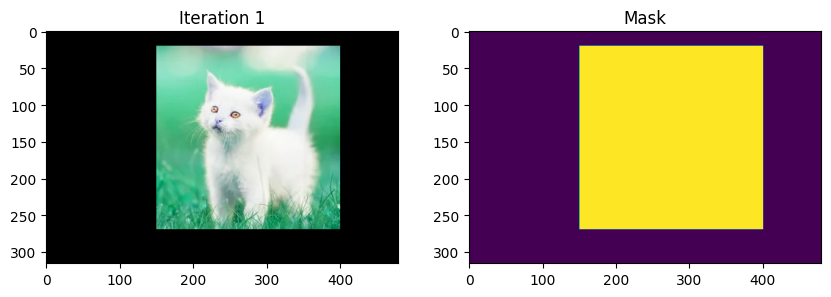

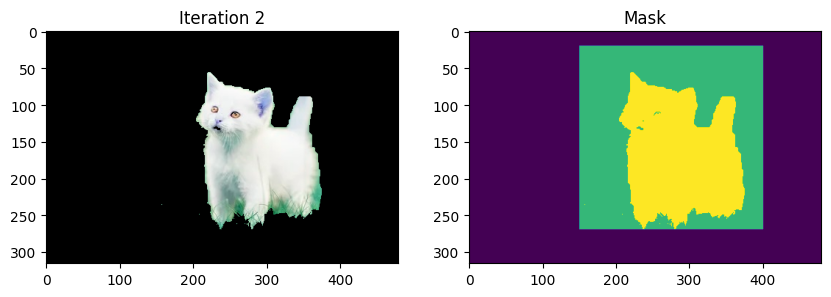

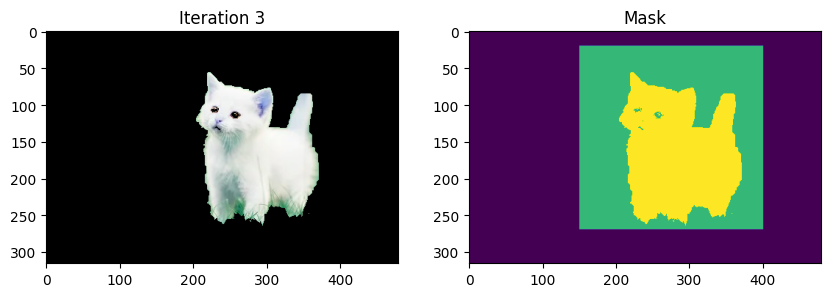

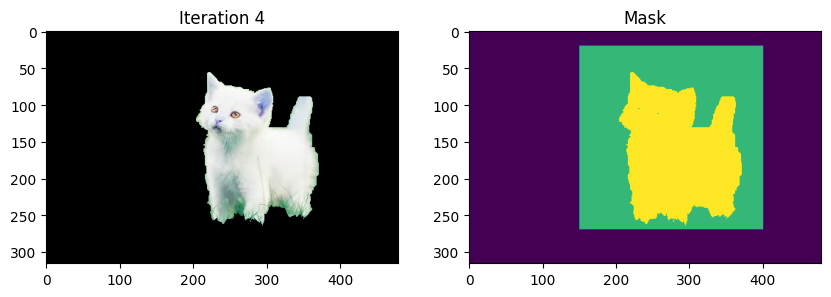

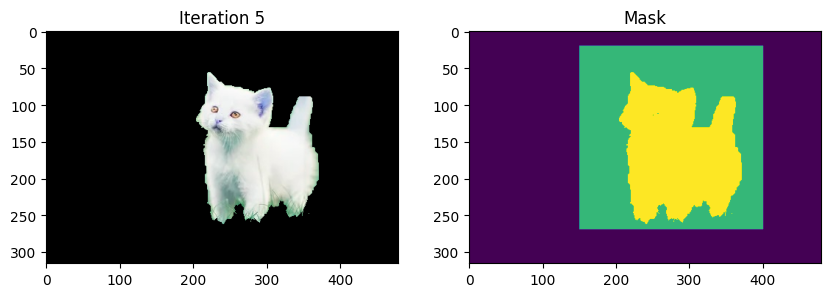

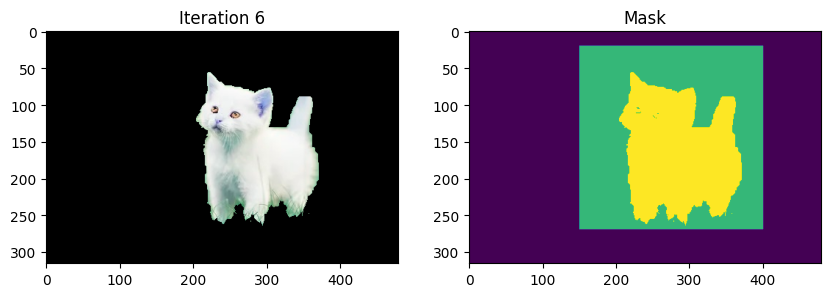

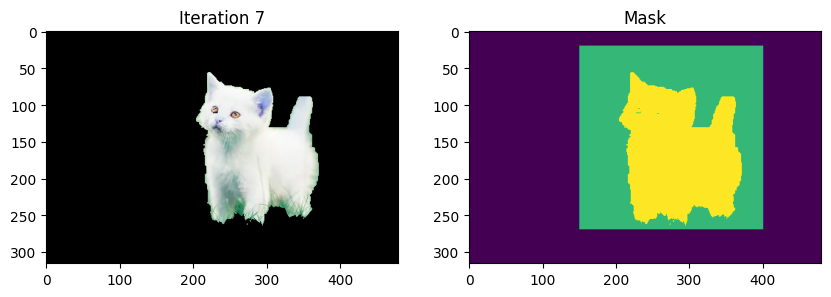

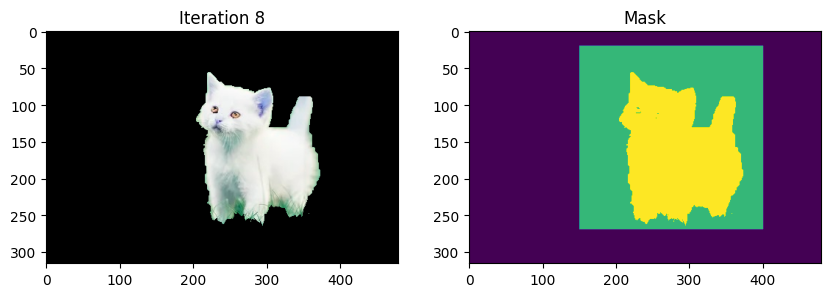

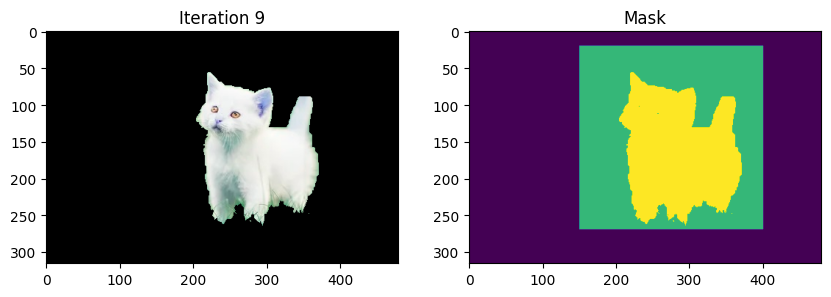

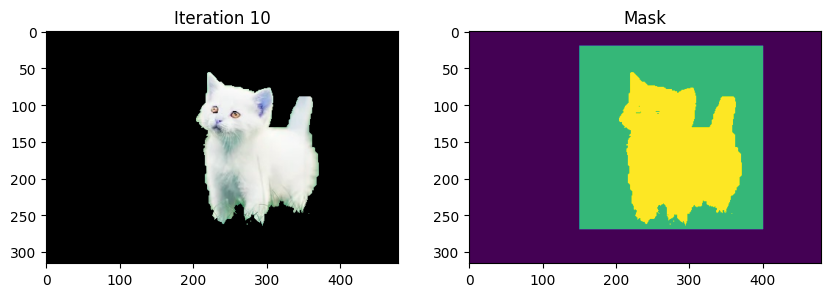

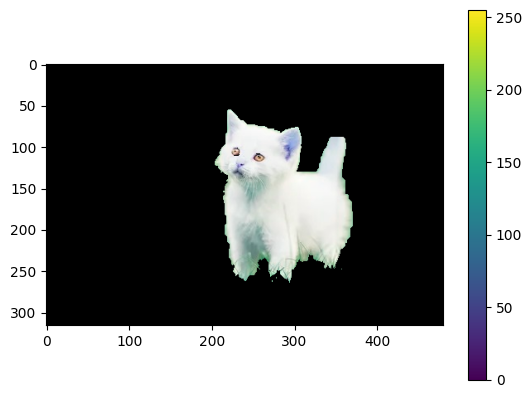

(<matplotlib.image.AxesImage at 0x2131d486cd0>,
 None)

In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('CatImage.jpg')
mask = np.zeros(img.shape[:2], np.uint8)
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
rect = (150, 20, 250, 250)

num_iterations = 10

for i in range(num_iterations):
    cv.grabCut(img, mask, rect, bgdModel, fgdModel, i, cv.GC_INIT_WITH_RECT)  # Одна итерация за раз

    mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')# 0 и 2 - background, 1 и 3 - foreground
    img_iter = img * mask2[:, :, np.newaxis]
   
    plt.figure(figsize=(10, 5))  # Увеличиваем размер изображения для лучшего просмотра
    plt.subplot(1, 2, 1)  # 1 строка, 2 столбца, 1-й subplot
    plt.imshow(img_iter), plt.title(f"Iteration {i+1}")

    plt.subplot(1, 2, 2) # 1 строка, 2 столбца, 2-й subplot
    plt.imshow(mask), plt.title("Mask")

    plt.show()

plt.imshow(img_iter), plt.colorbar(), plt.show() # Отображение конечного результата